## Data preprocessing

In [1]:
import os
from pathlib import Path

def count_images_in_subfolders(folder_path):
    """
    Count the number of images in the training and testing subfolders,
    each containing flip and notflip categories
    """
    base_folder = Path(folder_path)
    
    if not base_folder.exists():
        print(f"The folder {folder_path} does not exist")
        return
    
    # Paths to main subfolders
    training_folder = base_folder / "training"
    testing_folder = base_folder / "testing"
    
    # Image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif', '.webp'}
    
    results = {}
    
    # Count images in training subfolders
    training_flip_count = 0
    training_notflip_count = 0
    
    if training_folder.exists():
        flip_folder = training_folder / "flip"
        notflip_folder = training_folder / "notflip"
        
        # Count training flip images
        if flip_folder.exists():
            for file_path in flip_folder.iterdir():
                if file_path.is_file() and file_path.suffix.lower() in image_extensions:
                    training_flip_count += 1
        else:
            print("The 'training/flip' subfolder does not exist")
        
        # Count training notflip images
        if notflip_folder.exists():
            for file_path in notflip_folder.iterdir():
                if file_path.is_file() and file_path.suffix.lower() in image_extensions:
                    training_notflip_count += 1
        else:
            print("The 'training/notflip' subfolder does not exist")
    else:
        print("The 'training' folder does not exist")
    
    # Count images in testing subfolders
    testing_flip_count = 0
    testing_notflip_count = 0
    
    if testing_folder.exists():
        flip_folder = testing_folder / "flip"
        notflip_folder = testing_folder / "notflip"
        
        # Count testing flip images
        if flip_folder.exists():
            for file_path in flip_folder.iterdir():
                if file_path.is_file() and file_path.suffix.lower() in image_extensions:
                    testing_flip_count += 1
        else:
            print("The 'testing/flip' subfolder does not exist")
        
        # Count testing notflip images
        if notflip_folder.exists():
            for file_path in notflip_folder.iterdir():
                if file_path.is_file() and file_path.suffix.lower() in image_extensions:
                    testing_notflip_count += 1
        else:
            print("The 'testing/notflip' subfolder does not exist")
    else:
        print("The 'testing' folder does not exist")
    
    # Display results
    print("\n=== TRAINING DATA ===")
    print(f"Number of images in 'training/flip': {training_flip_count}")
    print(f"Number of images in 'training/notflip': {training_notflip_count}")
    print(f"Total training images: {training_flip_count + training_notflip_count}")
    
    print("\n=== TESTING DATA ===")
    print(f"Number of images in 'testing/flip': {testing_flip_count}")
    print(f"Number of images in 'testing/notflip': {testing_notflip_count}")
    print(f"Total testing images: {testing_flip_count + testing_notflip_count}")
    
    print("\n=== OVERALL SUMMARY ===")
    total_flip = training_flip_count + testing_flip_count
    total_notflip = training_notflip_count + testing_notflip_count
    total_all = total_flip + total_notflip
    print(f"Total 'flip' images: {total_flip}")
    print(f"Total 'notflip' images: {total_notflip}")
    print(f"GRAND TOTAL: {total_all} images")
    
    # Return structured results
    results = {
        'training': {
            'flip': training_flip_count,
            'notflip': training_notflip_count,
            'total': training_flip_count + training_notflip_count
        },
        'testing': {
            'flip': testing_flip_count,
            'notflip': testing_notflip_count,
            'total': testing_flip_count + testing_notflip_count
        },
        'overall': {
            'flip': total_flip,
            'notflip': total_notflip,
            'total': total_all
        }
    }
    
    return results

# Usage
folder_path = r"C:/Users/Admin/Documents/imagesreader"
results = count_images_in_subfolders(folder_path)


=== TRAINING DATA ===
Number of images in 'training/flip': 1162
Number of images in 'training/notflip': 1230
Total training images: 2392

=== TESTING DATA ===
Number of images in 'testing/flip': 290
Number of images in 'testing/notflip': 307
Total testing images: 597

=== OVERALL SUMMARY ===
Total 'flip' images: 1452
Total 'notflip' images: 1537
GRAND TOTAL: 2989 images


In [ ]:

# Display sample images from both classes with their properties

import cv2
import os
from pathlib import Path
import matplotlib.pyplot as plt

def display_sample_images_from_both_classes(folder_path):
    """
    Display one sample image from each class (flip and notflip) 
    along with their dimensions and properties.
    """
    # Initialize paths
    base_path = Path(folder_path)
    training_path = base_path / "training"
    
    # Define class subfolders
    classes = ["flip", "notflip"]
    class_paths = [training_path / class_name for class_name in classes]
    
    # Supported image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif', '.webp'}
    
    # Store images and their info
    sample_images = {}
    
    # Find one image from each class
    for class_name, class_path in zip(classes, class_paths):
        if not class_path.exists():
            print(f"Warning: {class_path} does not exist")
            continue
            
        # Find first valid image in the class folder
        for file_path in class_path.iterdir():
            if file_path.is_file() and file_path.suffix.lower() in image_extensions:
                # Load image with OpenCV
                image = cv2.imread(str(file_path))
                
                if image is not None:
                    # Convert from BGR to RGB for proper display
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    
                    # Store image data and info
                    sample_images[class_name] = {
                        'image': image_rgb,
                        'path': file_path,
                        'shape': image.shape,
                        'original_image': image  # Keep original for additional analysis
                    }
                    break  # Found one image, move to next class
    
    # Display results
    if not sample_images:
        print("No images found in the training folder")
        return
    
    # Create subplot for side-by-side comparison
    fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 6))
    
    # If only one image found, make axes iterable
    if len(sample_images) == 1:
        axes = [axes]
    
    # Plot each sample image
    for idx, (class_name, img_data) in enumerate(sample_images.items()):
        # Display image
        axes[idx].imshow(img_data['image'])
        
        # Set title with image information
        title = (f"Class: {class_name.upper()}\n"
                f"File: {img_data['path'].name}\n"
                f"Dimensions: {img_data['shape'][1]}x{img_data['shape'][0]} "
                f"(Width x Height)\n"
                f"Channels: {img_data['shape'][2] if len(img_data['shape']) == 3 else 1}")
        
        axes[idx].set_title(title, fontsize=12, fontweight='bold')
        axes[idx].axis('off')
        
        # Print detailed information to console
        print(f"\n=== {class_name.upper()} CLASS ===")
        print(f"Image path: {img_data['path']}")
        print(f"Dimensions (H, W, C): {img_data['shape']}")
        print(f"Height: {img_data['shape'][0]} pixels")
        print(f"Width: {img_data['shape'][1]} pixels")
        print(f"Channels: {img_data['shape'][2] if len(img_data['shape']) == 3 else 1}")
        print(f"Data type: {img_data['original_image'].dtype}")
        print(f"Value range: [{img_data['original_image'].min()}, {img_data['original_image'].max()}]")
    
    plt.tight_layout()
    plt.show()
    
    return sample_images


Loading sample images from both classes...

=== FLIP CLASS ===
Image path: C:\Users\Admin\Documents\imagesreader\training\flip\0001_000000010.jpg
Dimensions (H, W, C): (1920, 1080, 3)
Height: 1920 pixels
Width: 1080 pixels
Channels: 3
Data type: uint8
Value range: [0, 255]

=== NOTFLIP CLASS ===
Image path: C:\Users\Admin\Documents\imagesreader\training\notflip\0001_000000001.jpg
Dimensions (H, W, C): (1920, 1080, 3)
Height: 1920 pixels
Width: 1080 pixels
Channels: 3
Data type: uint8
Value range: [0, 255]


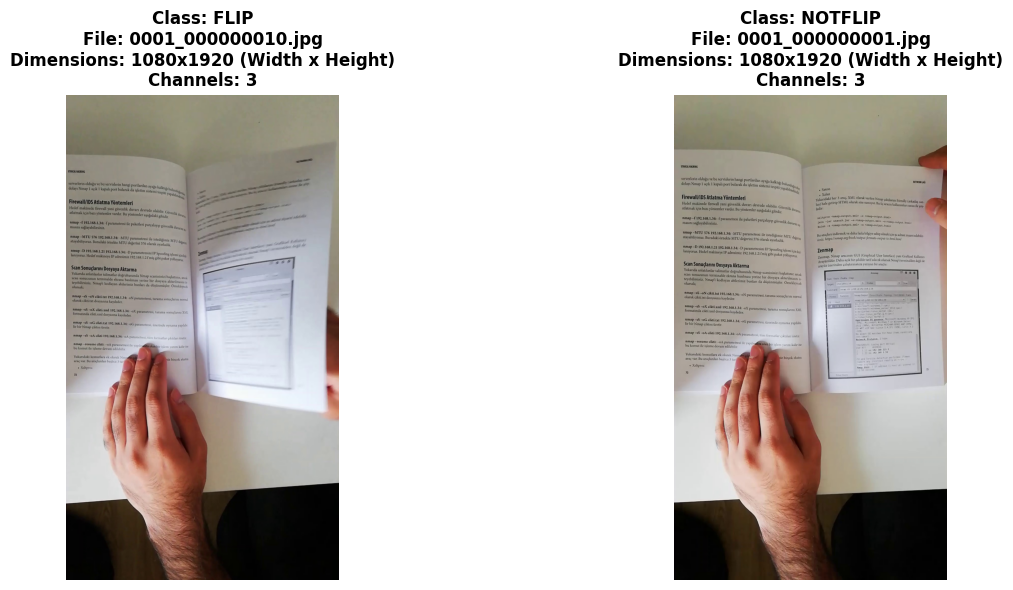

In [3]:

# Define your dataset path

dataset_path = r"C:/Users/Admin/Documents/imagesreader"

# Display images from both classes
print("Loading sample images from both classes...")
sample_images = display_sample_images_from_both_classes(dataset_path)
    



Images of training and testing data are not normalized for they range from 0 to 255.

In [5]:
import cv2
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

def find_sample_images(folder_path):
    """Find one sample image from each class"""
    base_path = Path(folder_path)
    training_path = base_path / "training"
    classes = ["flip", "notflip"]
    samples = {}
    
    for class_name in classes:
        class_path = training_path / class_name
        if not class_path.exists():
            print(f"Warning: {class_path} does not exist")
            continue
            
        # Find first image
        for file_path in class_path.iterdir():
            if file_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                samples[class_name] = file_path
                break
                
    return samples

def convert_to_grayscale(image_path):
    """Convert single image to grayscale"""
    original = cv2.imread(str(image_path))
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    return original_rgb, grayscale

def display_comparison(samples):
    """Display original vs grayscale comparison"""
    n_classes = len(samples)
    fig, axes = plt.subplots(n_classes, 2, figsize=(12, 5 * n_classes))
    
    if n_classes == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (class_name, image_path) in enumerate(samples.items()):
        original, grayscale = convert_to_grayscale(image_path)
        
        # Original image
        axes[idx, 0].imshow(original)
        axes[idx, 0].set_title(
            f"ORIGINAL - {class_name}\n"
            f"Shape: {original.shape}\n"
            f"Channels: {original.shape[2]}",
            fontweight='bold'
        )
        axes[idx, 0].axis('off')
        
        # Grayscale image
        axes[idx, 1].imshow(grayscale, cmap='gray')
        axes[idx, 1].set_title(
            f"GRAYSCALE - {class_name}\n"
            f"Shape: {grayscale.shape}\n"
            f"Channels: 1",
            fontweight='bold'
        )
        axes[idx, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print_properties(samples)

def print_properties(samples):
    """Print image properties"""
    print("IMAGE PROPERTIES COMPARISON")
    print("=" * 50)
    
    for class_name, image_path in samples.items():
        original, grayscale = convert_to_grayscale(image_path)
        
        print(f"\n{class_name.upper()} CLASS:")
        print(f"File: {image_path.name}")
        
        print("Original (RGB):")
        print(f"  Shape: {original.shape}")
        print(f"  Size: {original.shape[1]}x{original.shape[0]} pixels")
        print(f"  Memory: {original.nbytes:,} bytes")
        
        print("Grayscale:")
        print(f"  Shape: {grayscale.shape}")
        print(f"  Size: {grayscale.shape[1]}x{grayscale.shape[0]} pixels")
        print(f"  Memory: {grayscale.nbytes:,} bytes")
        
        savings = ((original.nbytes - grayscale.nbytes) / original.nbytes) * 100
        print(f"Memory savings: {savings:.1f}%")

def convert_dataset(original_folder, output_base_folder):
    """
    Convert entire dataset to grayscale and return results in separate training and testing folders
    
    Returns:
        dict: Dictionary with conversion results for each split
    """
    original_path = Path(original_folder)
    output_base_path = Path(output_base_folder)
    
    print("Converting dataset to grayscale...")
    
    results = {
        'training': {'flip': 0, 'notflip': 0, 'total': 0},
        'testing': {'flip': 0, 'notflip': 0, 'total': 0}
    }
    
    for split in ['training', 'testing']:
        print(f"\nProcessing {split} split...")
        
        for class_name in ['flip', 'notflip']:
            input_dir = original_path / split / class_name
            output_dir = output_base_path / split / class_name
            
            if not input_dir.exists():
                print(f"  Warning: {input_dir} does not exist")
                continue
                
            output_dir.mkdir(parents=True, exist_ok=True)
            count = 0
            
            for img_file in input_dir.iterdir():
                if img_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
                    img = cv2.imread(str(img_file))
                    if img is not None:
                        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        output_file = output_dir / img_file.name
                        cv2.imwrite(str(output_file), gray_img)
                        count += 1
            
            results[split][class_name] = count
            results[split]['total'] += count
            print(f"  Converted {class_name}: {count} images")
    
    # Print summary
    print("\nCONVERSION SUMMARY:")
    print("=" * 40)
    for split in ['training', 'testing']:
        print(f"{split.upper()}:")
        print(f"  Flip: {results[split]['flip']} images")
        print(f"  Notflip: {results[split]['notflip']} images")
        print(f"  Total: {results[split]['total']} images")
    
    total_all = results['training']['total'] + results['testing']['total']
    print(f"\nGRAND TOTAL: {total_all} images converted")
    print(f"Output location: {output_base_path}")
    
    return results

def verify_conversion(output_base_folder):
    """Verify the converted dataset structure"""
    output_path = Path(output_base_folder)
    
    print("\nVERIFYING CONVERSION:")
    print("=" * 30)
    
    for split in ['training', 'testing']:
        split_path = output_path / split
        if split_path.exists():
            print(f"\n{split.upper()} folder structure:")
            for class_name in ['flip', 'notflip']:
                class_path = split_path / class_name
                if class_path.exists():
                    image_count = len(list(class_path.glob("*.jpg"))) + len(list(class_path.glob("*.png")))
                    print(f"  {class_name}: {image_count} images")
                else:
                    print(f"  {class_name}: folder not found")
        else:
            print(f"\n{split.upper()}: folder not found")



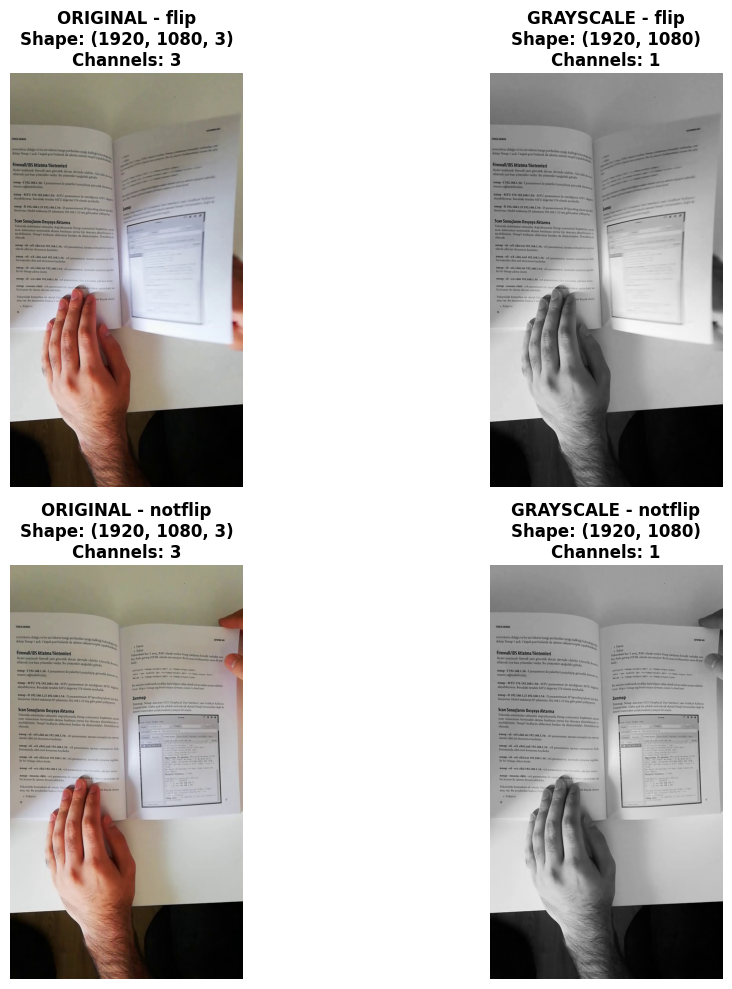

IMAGE PROPERTIES COMPARISON

FLIP CLASS:
File: 0001_000000010.jpg
Original (RGB):
  Shape: (1920, 1080, 3)
  Size: 1080x1920 pixels
  Memory: 6,220,800 bytes
Grayscale:
  Shape: (1920, 1080)
  Size: 1080x1920 pixels
  Memory: 2,073,600 bytes
Memory savings: 66.7%

NOTFLIP CLASS:
File: 0001_000000001.jpg
Original (RGB):
  Shape: (1920, 1080, 3)
  Size: 1080x1920 pixels
  Memory: 6,220,800 bytes
Grayscale:
  Shape: (1920, 1080)
  Size: 1080x1920 pixels
  Memory: 2,073,600 bytes
Memory savings: 66.7%
Converting dataset to grayscale...

Processing training split...
  Converted flip: 1162 images
  Converted notflip: 1230 images

Processing testing split...
  Converted flip: 290 images
  Converted notflip: 307 images

CONVERSION SUMMARY:
TRAINING:
  Flip: 1162 images
  Notflip: 1230 images
  Total: 2392 images
TESTING:
  Flip: 290 images
  Notflip: 307 images
  Total: 597 images

GRAND TOTAL: 2989 images converted
Output location: C:\Users\Admin\Documents\imagesreader\grayscale

VERIFYING CO

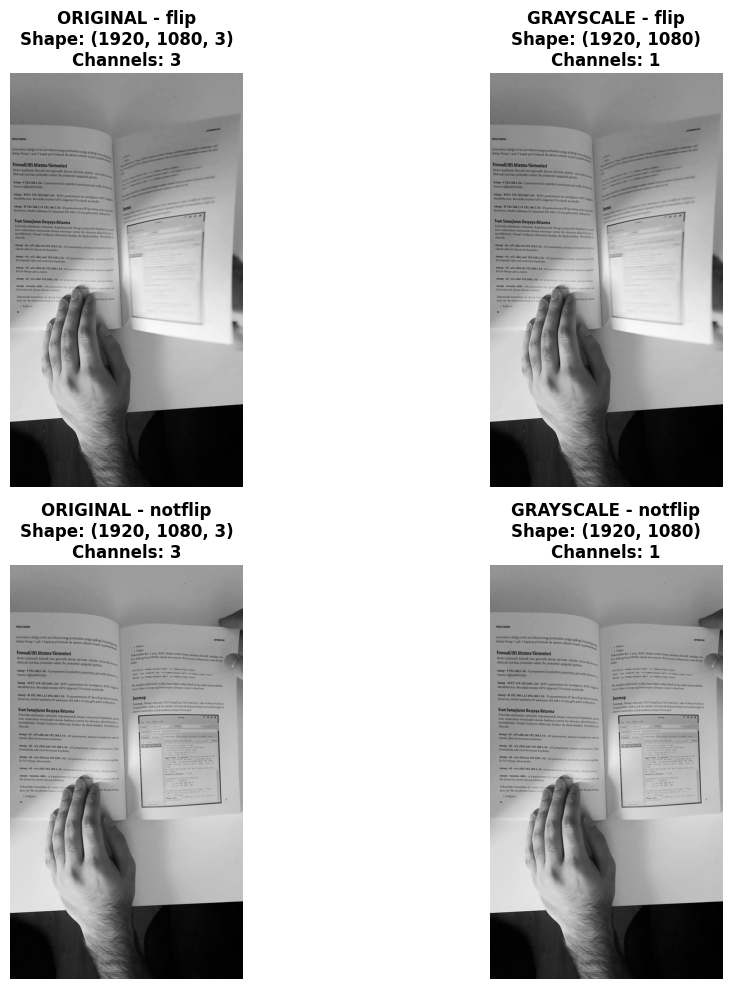

IMAGE PROPERTIES COMPARISON

FLIP CLASS:
File: 0001_000000010.jpg
Original (RGB):
  Shape: (1920, 1080, 3)
  Size: 1080x1920 pixels
  Memory: 6,220,800 bytes
Grayscale:
  Shape: (1920, 1080)
  Size: 1080x1920 pixels
  Memory: 2,073,600 bytes
Memory savings: 66.7%

NOTFLIP CLASS:
File: 0001_000000001.jpg
Original (RGB):
  Shape: (1920, 1080, 3)
  Size: 1080x1920 pixels
  Memory: 6,220,800 bytes
Grayscale:
  Shape: (1920, 1080)
  Size: 1080x1920 pixels
  Memory: 2,073,600 bytes
Memory savings: 66.7%


In [7]:
# Main execution
if __name__ == "__main__":
    dataset_path = r"C:/Users/Admin/Documents/imagesreader"
    output_path = r"C:/Users/Admin/Documents/imagesreader/grayscale"
    
    # Display sample comparison
    samples = find_sample_images(dataset_path)
    if samples:
        display_comparison(samples)
        
        # Convert entire dataset
        response = input("Convert entire dataset to grayscale? (y/n): ")
        if response.lower() == 'y':
            conversion_results = convert_dataset(dataset_path, output_path)
            
            # Verify the conversion
            verify_conversion(output_path)
            
            # Display samples from converted dataset
            print("\nDisplaying samples from converted dataset...")
            converted_samples = find_sample_images(output_path)
            if converted_samples:
                display_comparison(converted_samples)
    else:
        print("No sample images found")

In [ ]:
# Impoort labraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)



In [4]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [1]:
from pathlib import Path
import numpy as np
from PIL import Image
import torch

def load_and_preprocess_data(data_path, target_size=(224, 224)):  
    """Load and preprocess images from dataset"""
    data_path = Path(data_path)
    
    X_train, y_train = [], []
    X_test, y_test = [], []
    
    class_mapping = {'flip': 1, 'notflip': 0}

    print(f"Loading images with size {target_size}...")
    for split in ['training', 'testing']:
        split_path = data_path / split
        
        if not split_path.exists():
            print(f"Warning: {split_path} does not exist")
            continue
            
        for class_name, label in class_mapping.items():
            class_path = split_path / class_name
            
            if not class_path.exists():
                print(f"Warning: {class_path} does not exist")
                continue
                
            image_count = 0
            for img_file in class_path.glob('*.jpg'):
                try:
                    img = Image.open(img_file).convert('L')
                    img = img.resize(target_size)  
                    
                    img_array = np.array(img, dtype=np.float32)
                    img_array = img_array / 255.0
                    img_flattened = img_array.flatten()
                    
                    if split == 'training':
                        X_train.append(img_flattened)
                        y_train.append(label)
                    else:
                        X_test.append(img_flattened)
                        y_test.append(label)
                    
                    image_count += 1
                except Exception as e:
                    print(f"Error loading {img_file}: {e}")
            
            print(f"  Loaded {image_count} images from {split}/{class_name}")

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    print(f"\nTraining set: {X_train.shape[0]} images")
    print(f"Testing set: {X_test.shape[0]} images")
    print(f"Feature shape: {X_train.shape}")
    
    return X_train, y_train, X_test, y_test

In [ ]:
# Usage
X_train, y_train, X_test, y_test = load_and_preprocess_data('grayscale', target_size=(128, 128))  # ~40 MB


Loading images with size (128, 128)...
  Loaded 1162 images from training/flip
  Loaded 1230 images from training/notflip
  Loaded 290 images from testing/flip
  Loaded 307 images from testing/notflip

Training set: 2392 images
Testing set: 597 images
Feature shape: (2392, 16384)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample_images(X_train, y_train, target_size=(224, 224)):
    """Display one sample image from each class"""
    
    # Find indices for each class
    flip_idx = np.where(y_train == 1)[0][0]  # First 'flip' image
    notflip_idx = np.where(y_train == 0)[0][0]  # First 'notflip' image
    
    # Reshape flattened images back to 2D
    flip_img = X_train[flip_idx].reshape(target_size)
    notflip_img = X_train[notflip_idx].reshape(target_size)
    
    # Create figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display flip image
    axes[0].imshow(flip_img, cmap='gray')
    axes[0].set_title('Flip (Class 1)')
    axes[0].axis('off')
    
    # Display notflip image
    axes[1].imshow(notflip_img, cmap='gray')
    axes[1].set_title('Not Flip (Class 0)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

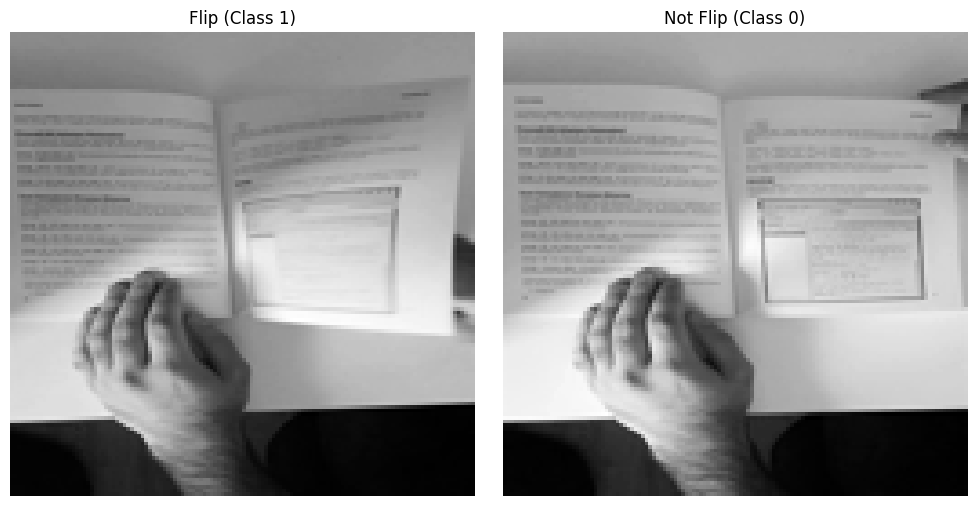

In [4]:
display_sample_images(X_train, y_train, target_size=(128, 128))

# Model training and evaluation

### 1. Import and data preparation

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


### 2. Reshape data for CNN (from flattened to 2D)

In [6]:
# Reshape flattened images back to 2D format (batch_size, channels, height, width)
target_size = (128, 128)  

# Reshape: (n_samples, height*width) -> (n_samples, 1, height, width)
X_train_reshaped = X_train.reshape(-1, 1, target_size[0], target_size[1])
X_test_reshaped = X_test.reshape(-1, 1, target_size[0], target_size[1])

print(f"Training data shape: {X_train_reshaped.shape}")
print(f"Testing data shape: {X_test_reshaped.shape}")

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_reshaped)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_reshaped)
y_test_tensor = torch.FloatTensor(y_test)

# Create DataLoader for batching (smaller batch size for CPU)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Training data shape: (2392, 1, 128, 128)
Testing data shape: (597, 1, 128, 128)


### 3. Define CNN Model

In [8]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # First convolutional block - preserves spatial structure
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second convolutional block
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Third convolutional block
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Calculate the size after all pooling layers
        # For 128x128 input: 128 -> 64 -> 32 -> 16 (after 3 pooling layers with stride 2)
        flattened_size = 64 * 16 * 16  # = 16384
        
        # Fully connected layers for classification
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(flattened_size, 64)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # First conv block
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        # Second conv block
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Third conv block
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        # Flatten and classify
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return x

# Initialize model
model = CNNModel().to(device)
model

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16384, out_features=64, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

### 4.  Define Loss and Optimizer

In [9]:
# Binary Cross Entropy Loss (for binary classification)
criterion = nn.BCELoss()

# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model ready for training!")

Model ready for training!


### 5. Training Loop

In [10]:
# Training parameters
num_epochs = 20

# Lists to store metrics for plotting
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

print("Starting training...")

for epoch in range(num_epochs):
    # ==================== Training Phase ====================
    model.train()  # Set model to training mode
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for batch_x, batch_y in train_loader:
        # Move data to device (GPU/CPU)
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device).unsqueeze(1)  # Add dimension for BCE loss
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate training metrics
        train_loss += loss.item() * batch_x.size(0)
        predictions = (outputs >= 0.5).float()
        train_correct += (predictions == batch_y).sum().item()
        train_total += batch_y.size(0)
    
    # Average training loss and accuracy for this epoch
    avg_train_loss = train_loss / train_total
    train_accuracy = 100 * train_correct / train_total
    
    # ==================== Testing Phase ====================
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():  # No gradient computation during testing
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device).unsqueeze(1)
            
            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            
            # Calculate testing metrics
            test_loss += loss.item() * batch_x.size(0)
            predictions = (outputs >= 0.5).float()
            test_correct += (predictions == batch_y).sum().item()
            test_total += batch_y.size(0)
    
    # Average testing loss and accuracy for this epoch
    avg_test_loss = test_loss / test_total
    test_accuracy = 100 * test_correct / test_total
    
    # Store metrics for plotting
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%")
    print(f"  Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")
    print("-" * 60)

print("Training completed!")

Starting training...
Epoch [1/20]
  Train Loss: 0.6534, Train Acc: 58.65%
  Test Loss: 0.5033, Test Acc: 75.21%
------------------------------------------------------------
Epoch [2/20]
  Train Loss: 0.4391, Train Acc: 79.39%
  Test Loss: 0.2743, Test Acc: 88.27%
------------------------------------------------------------
Epoch [3/20]
  Train Loss: 0.2249, Train Acc: 90.68%
  Test Loss: 0.1438, Test Acc: 93.63%
------------------------------------------------------------
Epoch [4/20]
  Train Loss: 0.1713, Train Acc: 93.81%
  Test Loss: 0.1151, Test Acc: 95.64%
------------------------------------------------------------
Epoch [5/20]
  Train Loss: 0.1285, Train Acc: 94.98%
  Test Loss: 0.1333, Test Acc: 95.64%
------------------------------------------------------------
Epoch [6/20]
  Train Loss: 0.1020, Train Acc: 96.36%
  Test Loss: 0.0586, Test Acc: 97.65%
------------------------------------------------------------
Epoch [7/20]
  Train Loss: 0.0885, Train Acc: 96.99%
  Test Loss: 0

### 6. Plot Training and Testing Metrics

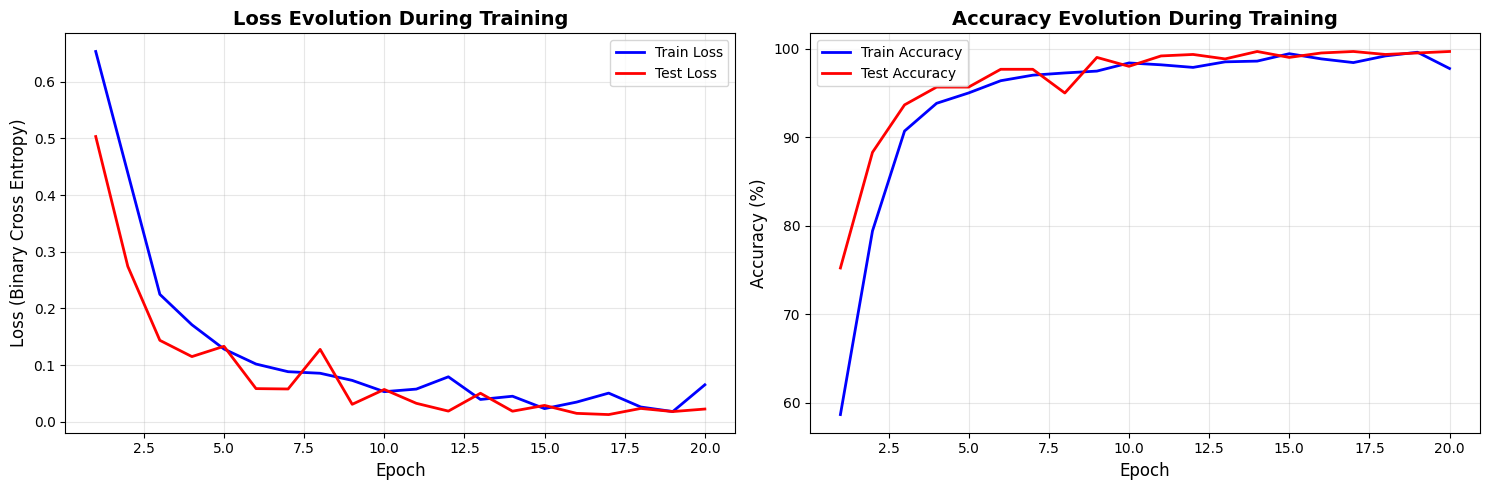


FINAL RESULTS
Final Train Accuracy: 97.74%
Final Test Accuracy: 99.66%
Final Train Loss: 0.0654
Final Test Loss: 0.0226


In [11]:
# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Loss evolution
ax1.plot(range(1, num_epochs + 1), train_losses, 'b-', label='Train Loss', linewidth=2)
ax1.plot(range(1, num_epochs + 1), test_losses, 'r-', label='Test Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Binary Cross Entropy)', fontsize=12)
ax1.set_title('Loss Evolution During Training', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Accuracy evolution
ax2.plot(range(1, num_epochs + 1), train_accuracies, 'b-', label='Train Accuracy', linewidth=2)
ax2.plot(range(1, num_epochs + 1), test_accuracies, 'r-', label='Test Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Accuracy Evolution During Training', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final results
print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Final Train Accuracy: {train_accuracies[-1]:.2f}%")
print(f"Final Test Accuracy: {test_accuracies[-1]:.2f}%")
print(f"Final Train Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")